<a href="https://colab.research.google.com/github/navyamunagala/Dissertation_brain_tumor_ML/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                               DISSERTATION

Project work:: Brain tumor detection by Machine Learning

BITS ID:: 2021ct93016
M.NAVYA

Created brain tumor dataset with the help of American Association of neurological surgeons and it is hypothetical dataset.




Importing the packages required

In [ ]:

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns
sns.set(color_codes=True)

# For splitting function
from sklearn.model_selection import train_test_split

# For normalization
from sklearn.preprocessing import StandardScaler

# Import the library for handling the imbalance dataset
from imblearn.over_sampling import SMOTE

# Naive Bayes Machine learning library
from sklearn.naive_bayes import GaussianNB

# Import the metrics
from sklearn import metrics

# Import the classification_report from metrics
from sklearn.metrics import classification_report

#Import the Logistic regression library
from sklearn.linear_model import LogisticRegression

#Import of K-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#Import for regularization
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from statistics import mean



Reading the dataset

In [ ]:
brain_tumor_data = pd.read_csv('/content/sample_data/brain_tumor_dataset.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Visualization and Exploration

In [ ]:
brain_tumor_data.head(2)

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class
0,1,SkullArea,Low,55,yes,2,Chordomas
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas


In [ ]:
brain_tumor_data.tail(2)

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class
5036,5037,spinalcord,High,60,yes,5,Meningiomas
5037,5038,SkullArea,Low,55,yes,2,Chordomas


In [ ]:
brain_tumor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Patient ID    5038 non-null   int64 
 1   AffectedArea  5038 non-null   object
 2   severity      5038 non-null   object
 3   Age           5038 non-null   int64 
 4   Treatment     5038 non-null   object
 5   Size          5038 non-null   int64 
 6   Class         5038 non-null   object
dtypes: int64(3), object(4)
memory usage: 275.6+ KB


In [ ]:
#This gives number of Rows and colums.
brain_tumor_data.shape

(5038, 7)

In [ ]:
## This gives the list of columns in the given data set.
brain_tumor_data.columns

Index(['Patient ID', 'AffectedArea', 'severity', 'Age', 'Treatment', 'Size',
       'Class'],
      dtype='object')

In [ ]:
brain_tumor_data.describe()

,Patient ID,Age,Size
count,5038.000000,5038.000000,5038.000000
mean,2519.500000,41.486503,2.921993
std,1454.489658,22.539483,1.232247
min,1.000000,8.000000,1.000000
25%,1260.250000,20.000000,2.000000
50%,2519.500000,55.000000,2.000000
75%,3778.750000,60.000000,4.000000
max,5038.000000,67.000000,5.000000


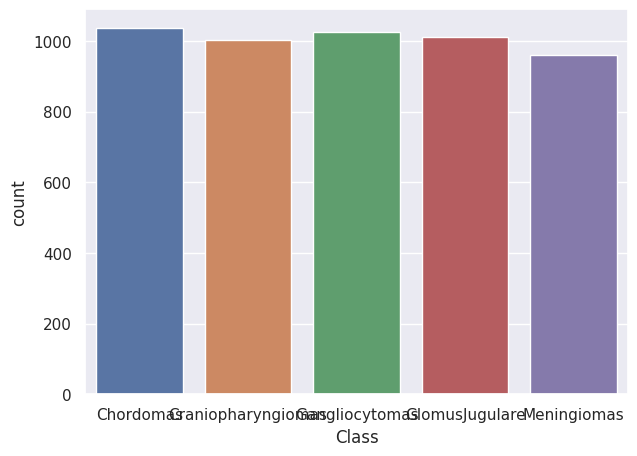

In [ ]:
# Countplot shows the count of the Class
# x-label is Class
# y-label is count

countplt, ax = plt.subplots(figsize = (7,5))
ax = sns.countplot(x = 'Class', data = brain_tumor_data)

array([[<Axes: title={'center': 'Patient ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Size'}>, <Axes: >]], dtype=object)

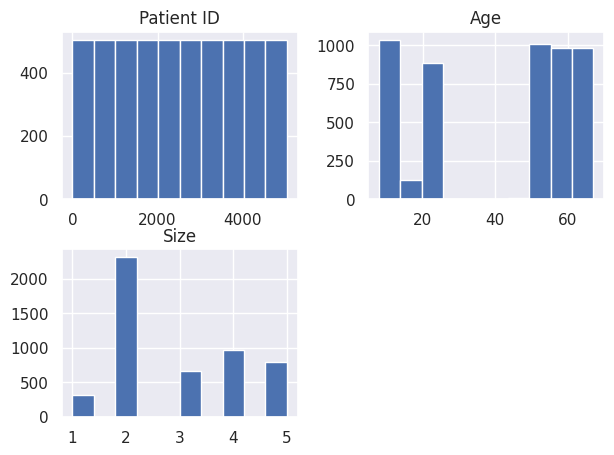

In [ ]:
## Histogram for appropriate visualization of the data set.
brain_tumor_data.hist(figsize = (7, 5))

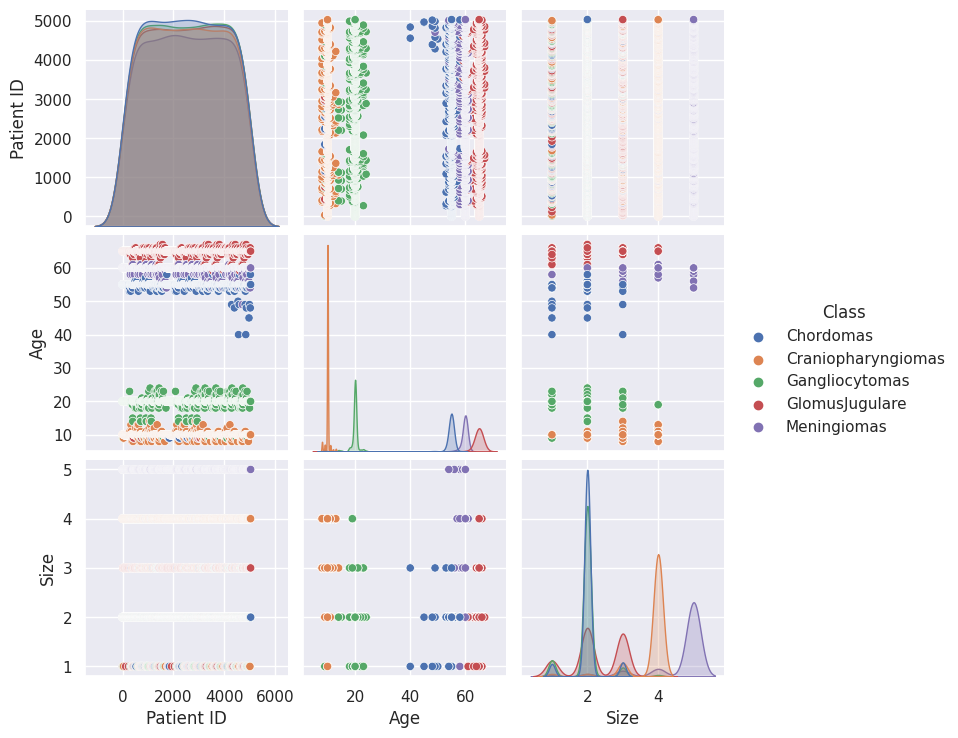

In [ ]:
## pair plot shows the relationship between the attributes
sns.pairplot(brain_tumor_data, hue = "Class")

In [ ]:
## Correlation matrix is created here for feature selection.
correlationMatrix = brain_tumor_data.corr()
correlationMatrix

<ipython-input-12-c365fbe60496>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMatrix = brain_tumor_data.corr()


,Patient ID,Age,Size
Patient ID,1.000000,0.001957,-0.009637
Age,0.001957,1.000000,-0.016268
Size,-0.009637,-0.016268,1.000000


<Axes: >

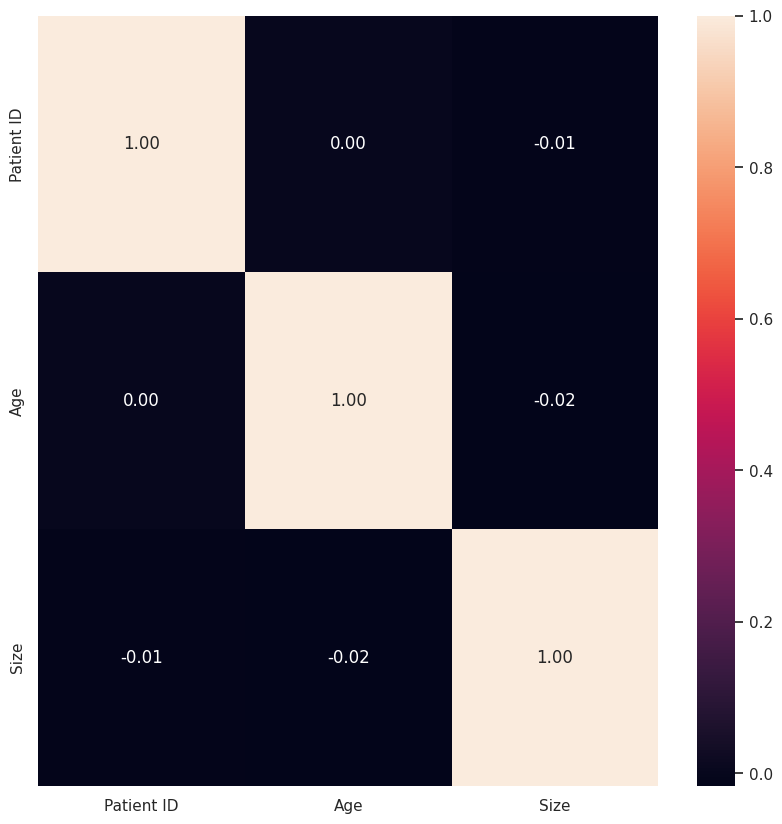

In [ ]:
## heat map
fig = plt.figure(num=None, figsize=(10, 10))
sns.heatmap(correlationMatrix, annot = True, fmt='.2f')

Data Pre-processing and Cleaning

In [ ]:
brain_tumor_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5033    False
5034    False
5035    False
5036    False
5037    False
Length: 5038, dtype: bool

In [ ]:
## brain_tumor_data.isnull().sum()

In [ ]:
unique_sets = brain_tumor_data.drop_duplicates(subset = ["Patient ID","AffectedArea","severity","Age","Treatment","Size","Class"])
print(unique_sets)

      Patient ID    AffectedArea severity  Age Treatment  Size  \
0              1       SkullArea      Low   55       yes     2   
1              2  pituitarygland      Low   10       yes     4   
2              3      Nervecells      Low   20       yes     2   
3              4       SkullBase      Low   65       yes     1   
4              5      spinalcord     High   60        No     5   
...          ...             ...      ...  ...       ...   ...   
5033        5034  pituitarygland      Low   10       yes     4   
5034        5035      Nervecells      Low   20       yes     2   
5035        5036       SkullBase      Low   65       yes     3   
5036        5037      spinalcord     High   60       yes     5   
5037        5038       SkullArea      Low   55       yes     2   

                   Class  
0              Chordomas  
1     Craniopharyngiomas  
2         Gangliocytomas  
3         GlomusJugulare  
4            Meningiomas  
...                  ...  
5033  Craniopharyn

In [ ]:
unique_sets.shape

(5038, 7)

In [ ]:
unique_sets.isnull().values.any()

False

In [ ]:
data = unique_sets[['Patient ID','AffectedArea','severity','Age','Treatment','Size','Class']].replace("empty",np.nan)
data.head(10)

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class
0,1,SkullArea,Low,55,yes,2,Chordomas
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas
2,3,Nervecells,Low,20,yes,2,Gangliocytomas
3,4,SkullBase,Low,65,yes,1,GlomusJugulare
4,5,spinalcord,High,60,No,5,Meningiomas
5,6,SkullArea,Low,55,yes,2,Chordomas
6,7,pituitarygland,Low,10,yes,4,Craniopharyngiomas
7,8,Nervecells,Low,20,yes,2,Gangliocytomas
8,9,SkullBase,Low,65,yes,2,GlomusJugulare
9,10,spinalcord,High,60,yes,5,Meningiomas


In [ ]:
data.describe()

,Patient ID,Age,Size
count,5038.000000,5038.000000,5038.000000
mean,2519.500000,41.486503,2.921993
std,1454.489658,22.539483,1.232247
min,1.000000,8.000000,1.000000
25%,1260.250000,20.000000,2.000000
50%,2519.500000,55.000000,2.000000
75%,3778.750000,60.000000,4.000000
max,5038.000000,67.000000,5.000000


In [ ]:
#median

data['Patient ID'].fillna(data['Patient ID'].median(),inplace=True)
data['Age'].fillna(data['Age'].median(),inplace=True)
data['Size'].fillna(data['Size'].median(),inplace=True)



In [ ]:
data.head(10)

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class
0,1,SkullArea,Low,55,yes,2,Chordomas
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas
2,3,Nervecells,Low,20,yes,2,Gangliocytomas
3,4,SkullBase,Low,65,yes,1,GlomusJugulare
4,5,spinalcord,High,60,No,5,Meningiomas
5,6,SkullArea,Low,55,yes,2,Chordomas
6,7,pituitarygland,Low,10,yes,4,Craniopharyngiomas
7,8,Nervecells,Low,20,yes,2,Gangliocytomas
8,9,SkullBase,Low,65,yes,2,GlomusJugulare
9,10,spinalcord,High,60,yes,5,Meningiomas


In [ ]:
data.describe()

,Patient ID,Age,Size
count,5038.000000,5038.000000,5038.000000
mean,2519.500000,41.486503,2.921993
std,1454.489658,22.539483,1.232247
min,1.000000,8.000000,1.000000
25%,1260.250000,20.000000,2.000000
50%,2519.500000,55.000000,2.000000
75%,3778.750000,60.000000,4.000000
max,5038.000000,67.000000,5.000000


In [ ]:
data.head(10)

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class
0,1,SkullArea,Low,55,yes,2,Chordomas
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas
2,3,Nervecells,Low,20,yes,2,Gangliocytomas
3,4,SkullBase,Low,65,yes,1,GlomusJugulare
4,5,spinalcord,High,60,No,5,Meningiomas
5,6,SkullArea,Low,55,yes,2,Chordomas
6,7,pituitarygland,Low,10,yes,4,Craniopharyngiomas
7,8,Nervecells,Low,20,yes,2,Gangliocytomas
8,9,SkullBase,Low,65,yes,2,GlomusJugulare
9,10,spinalcord,High,60,yes,5,Meningiomas


Outliers

In [ ]:
#import matplotlib.pyplot as plt
%matplotlib inline

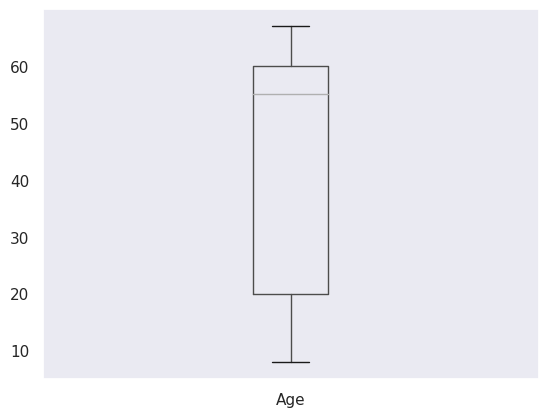

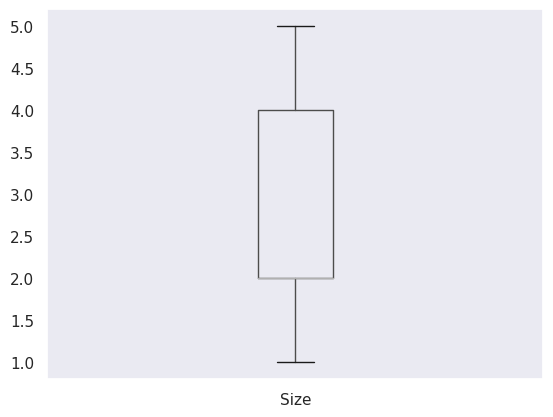

In [ ]:
# define a function called "plot_boxplot"
# to check the outliers in dataset

def plot_boxplot(df, columns):
  df.boxplot(column=[columns])
  plt.grid(False)
  plt.show()

plot_boxplot(data , "Age")
plot_boxplot(data , "Size")






remove outliers

In [ ]:
data.describe()

,Patient ID,Age,Size
count,5038.000000,5038.000000,5038.000000
mean,2519.500000,41.486503,2.921993
std,1454.489658,22.539483,1.232247
min,1.000000,8.000000,1.000000
25%,1260.250000,20.000000,2.000000
50%,2519.500000,55.000000,2.000000
75%,3778.750000,60.000000,4.000000
max,5038.000000,67.000000,5.000000


In [ ]:
# define a funtion called outliers which returns a list of index of outliers
# IQR = Q3-Q1
# +/- 1.5*IQR

def outliers(df, columns):
  Q1 = df[columns].quantile(0.25)
  Q3 = df[columns].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[(df[columns] < lower_bound) | (df[columns] > upper_bound)]
  return ls


In [ ]:
# create am empty list to store the output indices from multiple columns

index_list = []
for braintumor in ['Age','Size']:
   index_list.extend(outliers(data, braintumor))

In [ ]:
index_list

[]

In [ ]:
# to remove outliers from data set

def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
clean_data = remove(data, index_list)

In [ ]:
clean_data.shape

(5038, 7)

In [ ]:
#Splitting the area of the dataset into 4 bins of tumor sizes and applying discretization to transform the continuos data into discrete values by grouping it.

clean_data['size_data'] = pd.cut(x= clean_data['Size'],bins = 4 ,labels = ['Tiny','Small','Medium','Big'] )
clean_data['size_data'].value_counts()

Tiny      2620
Medium     965
Big        788
Small      665
Name: size_data, dtype: int64

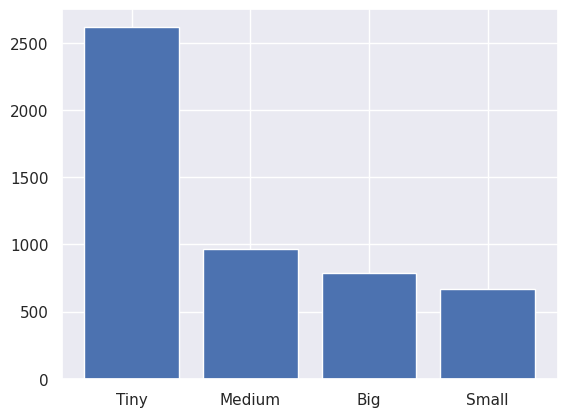

In [ ]:
# Method to draw bar plot for the data set
def draw_barplot(x):
  s = x.value_counts()
  plt.bar( s.index,s.values)
size_data = draw_barplot(clean_data['size_data'])

In [ ]:
# Applying feature engineering technique - Discretization to tranform continuos numerical data by mapping values to interval concept labels.
# This helps to maintain the data easily.Training a model with discrete data beocmes faster than with the continuos data
# Main challenge in Discretization lies in choosing the number of intervals or bins
# Applying Equal width Discretization to separate possible values into 'N' number of bins ,each having same width which can be done by KBinsDiscretizer


from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=4 , encode = 'ordinal' , strategy = 'uniform')
clean_data['Size_uniform_discrete']= discretizer.fit_transform(clean_data['Size'].values.reshape(-1,1)).astype(int)
clean_data.head()

,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class,size_data,Size_uniform_discrete
0,1,SkullArea,Low,55,yes,2,Chordomas,Tiny,1
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas,Medium,3
2,3,Nervecells,Low,20,yes,2,Gangliocytomas,Tiny,1
3,4,SkullBase,Low,65,yes,1,GlomusJugulare,Tiny,0
4,5,spinalcord,High,60,No,5,Meningiomas,Big,3


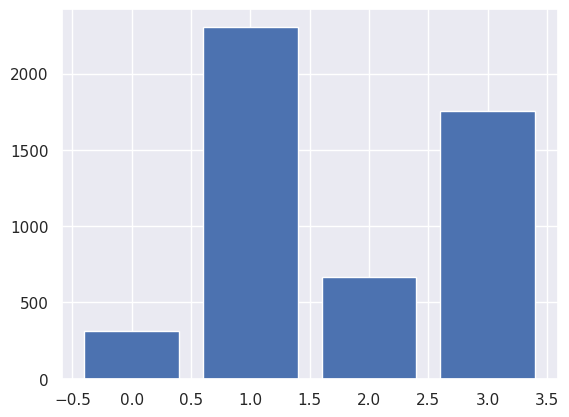

In [ ]:
draw_barplot(clean_data['Size_uniform_discrete'])

In [ ]:
discretizer.bin_edges_

array([array([1., 2., 3., 4., 5.])], dtype=object)

In [ ]:
# Applying Equal frequency discretization where data points will be same but the width might differ
discretizer = KBinsDiscretizer(n_bins=4 , encode = 'ordinal' , strategy = 'quantile')
clean_data['Size_eq_freq']= discretizer.fit_transform(clean_data['Size'].values.reshape(-1,1)).astype(int)
clean_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class,size_data,Size_uniform_discrete,Size_eq_freq
0,1,SkullArea,Low,55,yes,2,Chordomas,Tiny,1,1
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas,Medium,3,2
2,3,Nervecells,Low,20,yes,2,Gangliocytomas,Tiny,1,1
3,4,SkullBase,Low,65,yes,1,GlomusJugulare,Tiny,0,0
4,5,spinalcord,High,60,No,5,Meningiomas,Big,3,2


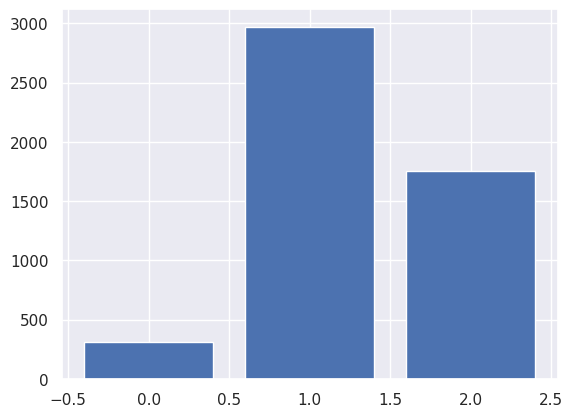

In [ ]:
Size_eq_freq = draw_barplot(clean_data['Size_eq_freq'])

In [ ]:
discretizer.bin_edges_

array([array([1., 2., 4., 5.])], dtype=object)

In [ ]:
#Applying Cluster algorithm to convert continous variable to discrete variable

discretizer = KBinsDiscretizer(n_bins=4 , encode = 'ordinal' , strategy = 'kmeans')
clean_data['Size_kmeans_discrete']= discretizer.fit_transform(clean_data['Size'].values.reshape(-1,1)).astype(int)
clean_data.head()


,Patient ID,AffectedArea,severity,Age,Treatment,Size,Class,size_data,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete
0,1,SkullArea,Low,55,yes,2,Chordomas,Tiny,1,1,0
1,2,pituitarygland,Low,10,yes,4,Craniopharyngiomas,Medium,3,2,2
2,3,Nervecells,Low,20,yes,2,Gangliocytomas,Tiny,1,1,0
3,4,SkullBase,Low,65,yes,1,GlomusJugulare,Tiny,0,0,0
4,5,spinalcord,High,60,No,5,Meningiomas,Big,3,2,3


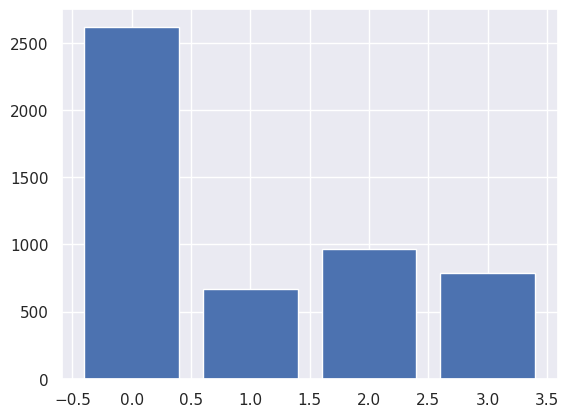

In [ ]:
draw_barplot(clean_data['Size_kmeans_discrete'])

In [ ]:
clean_data_set = clean_data.drop(['Class','AffectedArea','severity','Treatment','size_data'], axis=1)
clean_data_set

,Patient ID,Age,Size,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete
0,1,55,2,1,1,0
1,2,10,4,3,2,2
2,3,20,2,1,1,0
3,4,65,1,0,0,0
4,5,60,5,3,2,3
...,...,...,...,...,...,...
5033,5034,10,4,3,2,2
5034,5035,20,2,1,1,0
5035,5036,65,3,2,1,1
5036,5037,60,5,3,2,3


In [ ]:
#Applying Normalisation to convert the values within the minimum valie of 0 and max value of 1
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df_normalised = Scaler.fit_transform(clean_data_set)
print(df_normalised)
clean_data_set

[[0.00000000e+00 7.96610169e-01 2.50000000e-01 3.33333333e-01
  5.00000000e-01 0.00000000e+00]
 [1.98530872e-04 3.38983051e-02 7.50000000e-01 1.00000000e+00
  1.00000000e+00 6.66666667e-01]
 [3.97061743e-04 2.03389831e-01 2.50000000e-01 3.33333333e-01
  5.00000000e-01 0.00000000e+00]
 ...
 [9.99602938e-01 9.66101695e-01 5.00000000e-01 6.66666667e-01
  5.00000000e-01 3.33333333e-01]
 [9.99801469e-01 8.81355932e-01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 7.96610169e-01 2.50000000e-01 3.33333333e-01
  5.00000000e-01 0.00000000e+00]]


,Patient ID,Age,Size,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete
0,1,55,2,1,1,0
1,2,10,4,3,2,2
2,3,20,2,1,1,0
3,4,65,1,0,0,0
4,5,60,5,3,2,3
...,...,...,...,...,...,...
5033,5034,10,4,3,2,2
5034,5035,20,2,1,1,0
5035,5036,65,3,2,1,1
5036,5037,60,5,3,2,3


In [ ]:
allColumns = ['Patient ID', 'Age', 'Size', 'Size_uniform_discrete', 'Size_eq_freq', 'Size_kmeans_discrete']

df_normalised = pd.DataFrame(df_normalised,columns = allColumns)
# df_normalised.drop(['size_cat','Area_uniform_discrete','Area_eq_freq'], axis = 1, inplace = True)
df_normalised.shape
filteredDataSet = df_normalised.join(brain_tumor_data.filter(['Class'], axis = 1))
filteredDataSet

,Patient ID,Age,Size,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete,Class
0,0.000000,0.796610,0.25,0.333333,0.5,0.000000,Chordomas
1,0.000199,0.033898,0.75,1.000000,1.0,0.666667,Craniopharyngiomas
2,0.000397,0.203390,0.25,0.333333,0.5,0.000000,Gangliocytomas
3,0.000596,0.966102,0.00,0.000000,0.0,0.000000,GlomusJugulare
4,0.000794,0.881356,1.00,1.000000,1.0,1.000000,Meningiomas
...,...,...,...,...,...,...,...
5033,0.999206,0.033898,0.75,1.000000,1.0,0.666667,Craniopharyngiomas
5034,0.999404,0.203390,0.25,0.333333,0.5,0.000000,Gangliocytomas
5035,0.999603,0.966102,0.50,0.666667,0.5,0.333333,GlomusJugulare
5036,0.999801,0.881356,1.00,1.000000,1.0,1.000000,Meningiomas


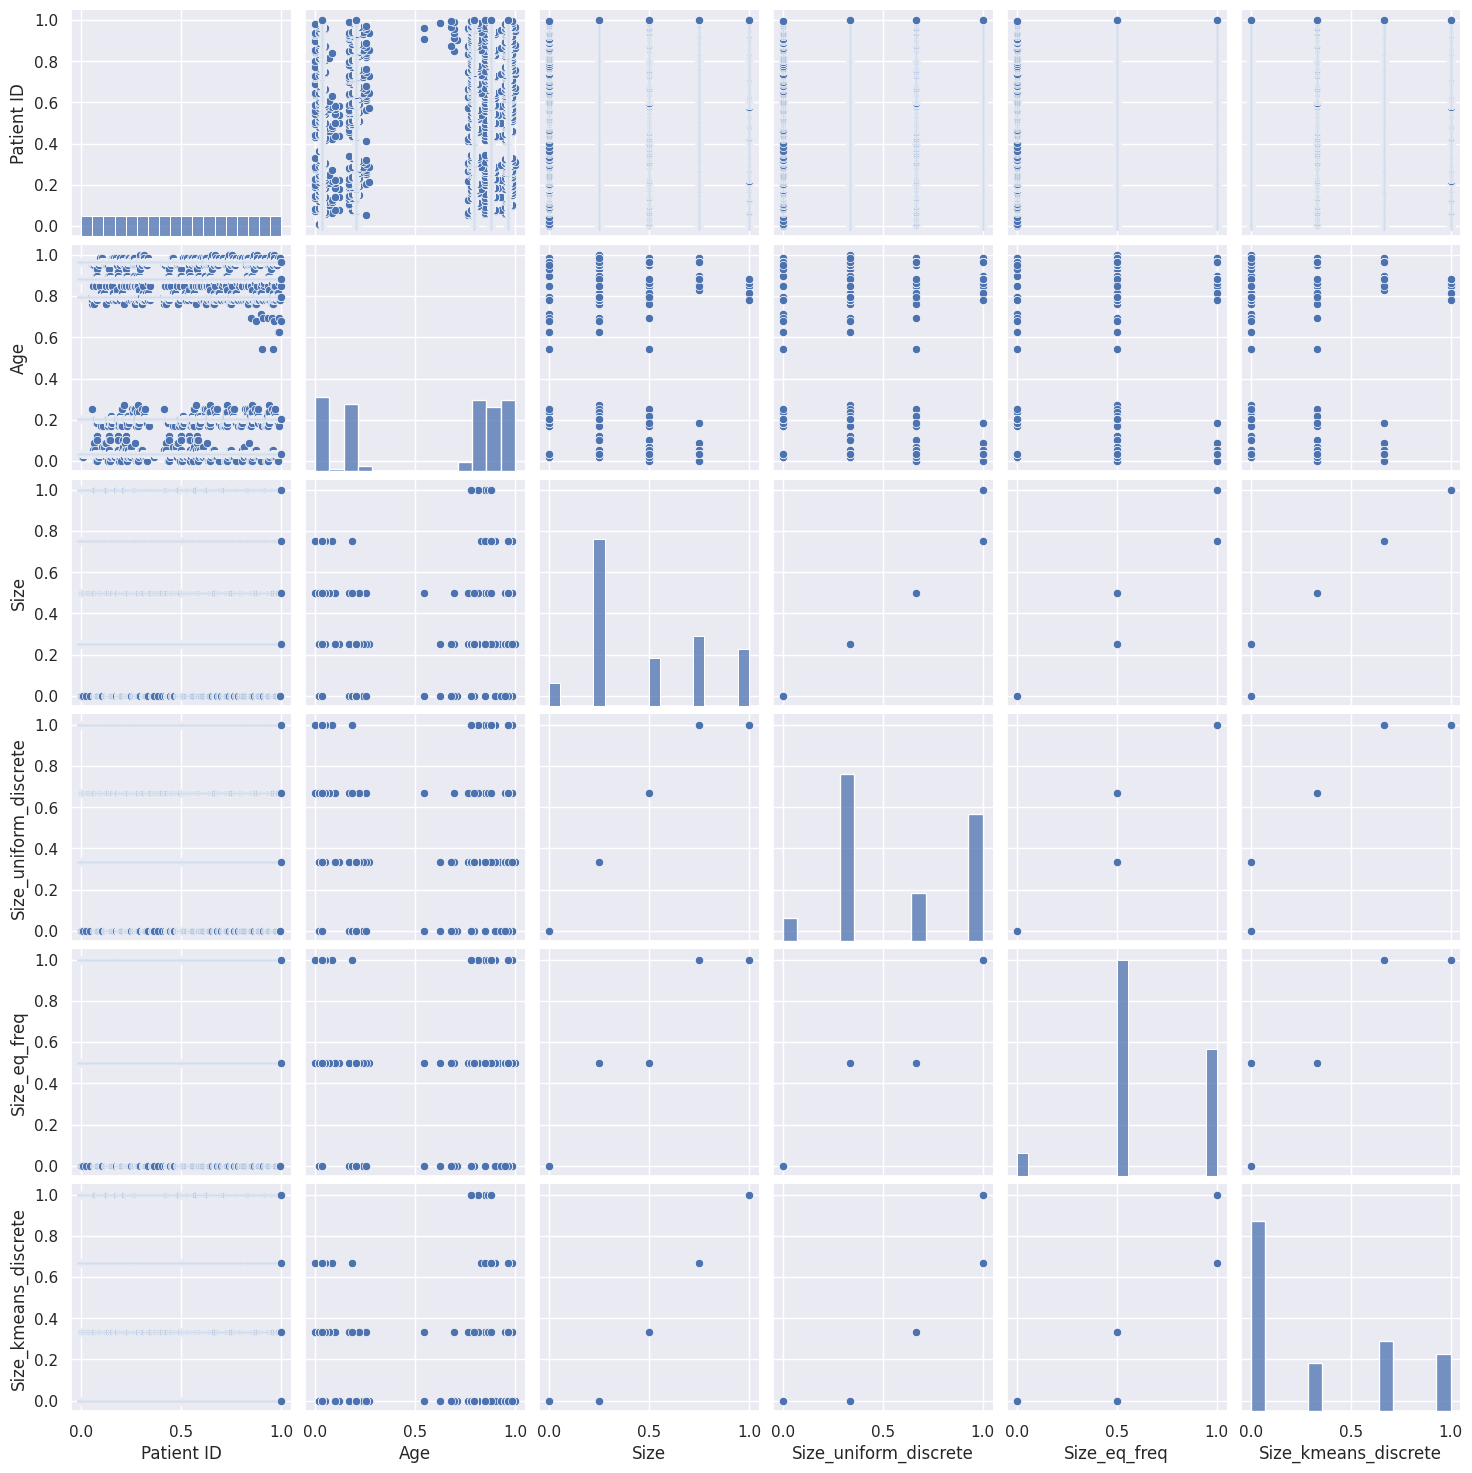

In [ ]:
sns.pairplot(filteredDataSet)

In [ ]:
filteredDataSet.describe()

,Patient ID,Age,Size,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete
count,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000,5038.000000
mean,0.500000,0.567568,0.480498,0.588527,0.642815,0.328106
std,0.288761,0.382025,0.308062,0.333371,0.286689,0.385466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.203390,0.250000,0.333333,0.500000,0.000000
50%,0.500000,0.796610,0.250000,0.333333,0.500000,0.000000
75%,0.750000,0.881356,0.750000,1.000000,1.000000,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_normalised

,Patient ID,Age,Size,Size_uniform_discrete,Size_eq_freq,Size_kmeans_discrete
0,0.000000,0.796610,0.25,0.333333,0.5,0.000000
1,0.000199,0.033898,0.75,1.000000,1.0,0.666667
2,0.000397,0.203390,0.25,0.333333,0.5,0.000000
3,0.000596,0.966102,0.00,0.000000,0.0,0.000000
4,0.000794,0.881356,1.00,1.000000,1.0,1.000000
...,...,...,...,...,...,...
5033,0.999206,0.033898,0.75,1.000000,1.0,0.666667
5034,0.999404,0.203390,0.25,0.333333,0.5,0.000000
5035,0.999603,0.966102,0.50,0.666667,0.5,0.333333
5036,0.999801,0.881356,1.00,1.000000,1.0,1.000000


Model Building

In [ ]:
X = filteredDataSet.drop(["Class"], axis=1)
y= filteredDataSet["Class"]
y

0                Chordomas
1       Craniopharyngiomas
2           Gangliocytomas
3           GlomusJugulare
4              Meningiomas
               ...        
5033    Craniopharyngiomas
5034        Gangliocytomas
5035        GlomusJugulare
5036           Meningiomas
5037             Chordomas
Name: Class, Length: 5038, dtype: object

In [ ]:
# Split X and y into training and test set in 80:20 ratio
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=1)
columns1=X_train1.columns
print("Train-Set-1 :" + str(X_train1.shape))
print("Test-Set-1:" + str(X_test1.shape))

Train-Set-1 :(4030, 6)
Test-Set-1:(1008, 6)


In [ ]:
# Split X and y into training and test set in 10:90 ratio
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.9,random_state=1)
columns2=X_train2.columns
print("Train-Set-2 :" + str(X_train2.shape))
print("Test-Set-2:" + str(X_test2.shape))

Train-Set-2 :(503, 6)
Test-Set-2:(4535, 6)


Scaling

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

Managing the imbalance class

In [ ]:
Ov_sampling=SMOTE(random_state=0)

# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
ov_data_X,ov_data_y=Ov_sampling.fit_resample=(X_train1 ,y_train1)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns1)
ov_data_y=pd.DataFrame(ov_data_y,columns=['Class'])

ov_data_X2,ov_data_y2=Ov_sampling.fit_resample=(X_train2 ,y_train2)
ov_data_X2=pd.DataFrame(data=ov_data_X2,columns=columns2)
ov_data_y2=pd.DataFrame(ov_data_y2,columns=['Class'])

In [ ]:
print("Case 1: Train = 80% , Test = 20%")
print('length of oversampled data is   ', len(ov_data_X))
print('Number of no subscription in oversampled data ', len(ov_data_y[ov_data_y['Class']==0]))
print('Number of subscription ', len(ov_data_y[ov_data_y['Class']==1]))
print('Proportion of no subscription data in oversampled data is ', len(ov_data_y[ov_data_y['Class']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is ', len(ov_data_y[ov_data_y['Class']==1])/len(ov_data_X))
print("\n\n")

print("Case 2: Train = 10%, Test = 90%")
print('length of oversampled data is   ', len(ov_data_X2))
print('Number of no subscription in oversampled data ', len(ov_data_y2[ov_data_y2['Class']==0]))
print('Number of subscription ', len(ov_data_y2[ov_data_y2['Class']==1]))
print('Proportion of no subscription data in oversampled data is ', len(ov_data_y2[ov_data_y2['Class']==0])/len(ov_data_X2))
print('Proportion of subscription data in oversampled data is ', len(ov_data_y2[ov_data_y2['Class']==1])/len(ov_data_X2))


Case 1: Train = 80% , Test = 20%
length of oversampled data is    4030
Number of no subscription in oversampled data  0
Number of subscription  0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0



Case 2: Train = 10%, Test = 90%
length of oversampled data is    503
Number of no subscription in oversampled data  0
Number of subscription  0
Proportion of no subscription data in oversampled data is  0.0
Proportion of subscription data in oversampled data is  0.0


Naive Bayes Model

In [ ]:
model=GaussianNB()
model.fit(ov_data_X,ov_data_y)
pred = model.predict(X_test1)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test1, pred)*100)

Gaussian Naive Bayes model accuracy(in %): 87.6984126984127


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
model2=GaussianNB()
model2.fit(ov_data_X2,ov_data_y2)
pred2 = model2.predict(X_test2)

print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test2, pred2)*100)

Gaussian Naive Bayes model accuracy(in %): 95.63395810363838


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Confusion matrix is a table that is often used to describe the performance of classification model(or classifier)
#on a set of test data for which the true values are known.
#Accuracy, precision recall and F1-score can be computed based on confusion matrix.
print("Case 1: Train = 80% , Test = 20%")
model_score = model.score(X_test1, y_test1)
print('Model score :', model_score)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test1,pred))
print(classification_report(y_test1,pred))


print("Case 2: Train = 10% , Test = 90%")
model_score2 = model2.score(X_test2, y_test2)
print('Model score :', model_score2)
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test2, pred2))

print(classification_report(y_test2, pred2))

Case 1: Train = 80% , Test = 20%
Model score : 0.876984126984127
Confusion Matrix:
 [[182   0   0  17   0]
 [  0 188   8   0   0]
 [  0   0 204   0   0]
 [ 80   0   2 123   2]
 [  3   0   1  11 187]]
                    precision    recall  f1-score   support

         Chordomas       0.69      0.91      0.78       199
Craniopharyngiomas       1.00      0.96      0.98       196
    Gangliocytomas       0.95      1.00      0.97       204
    GlomusJugulare       0.81      0.59      0.69       207
       Meningiomas       0.99      0.93      0.96       202

          accuracy                           0.88      1008
         macro avg       0.89      0.88      0.88      1008
      weighted avg       0.89      0.88      0.88      1008

Case 2: Train = 10% , Test = 90%
Model score : 0.9563395810363837
Confusion Matrix:
 [[886   0   5   0  58]
 [  0 875  18   0   0]
 [  0   0 921   0   6]
 [ 64   0  11 824   7]
 [ 26   0   3   0 831]]
                    precision    recall  f1-score   supp

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:


print("Case 1: Train = 80% , Test = 20%")
print('Accuracy :', metrics.accuracy_score(y_test1, pred))
print('Precision :', metrics.precision_score(y_test1, pred, average="weighted"))
print('Recall :', metrics.recall_score(y_test1, pred, average="weighted"))
print('F-score :', metrics.f1_score(y_test1, pred, average="weighted"))
print("\n\n")
print("Case 2: Train = 10% , Test = 90%")
print('Accuracy :', metrics.accuracy_score(y_test2, pred2))
print('Precision :', metrics.precision_score(y_test2, pred2, average="weighted"))
print('Recall :', metrics.recall_score(y_test2, pred2, average="weighted"))
print('F-score :', metrics.f1_score(y_test2, pred2, average="weighted"))

Case 1: Train = 80% , Test = 20%
Accuracy : 0.876984126984127
Precision : 0.8876119213423124
Recall : 0.876984126984127
F-score : 0.8751297041749339



Case 2: Train = 10% , Test = 90%
Accuracy : 0.9563395810363837
Precision : 0.9578815935627603
Recall : 0.9563395810363837
F-score : 0.9564682279654237


Logistic Regression

In [ ]:
filteredDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5038 entries, 0 to 5037
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient ID             5038 non-null   float64
 1   Age                    5038 non-null   float64
 2   Size                   5038 non-null   float64
 3   Size_uniform_discrete  5038 non-null   float64
 4   Size_eq_freq           5038 non-null   float64
 5   Size_kmeans_discrete   5038 non-null   float64
 6   Class                  5038 non-null   object 
dtypes: float64(6), object(1)
memory usage: 275.6+ KB


In [ ]:
#Get target data
y = filteredDataSet["Class"]
X = filteredDataSet.drop(['Patient ID','Class'], axis=1)
print(X.head())
print(X.shape)

        Age  Size  Size_uniform_discrete  Size_eq_freq  Size_kmeans_discrete
0  0.796610  0.25               0.333333           0.5              0.000000
1  0.033898  0.75               1.000000           1.0              0.666667
2  0.203390  0.25               0.333333           0.5              0.000000
3  0.966102  0.00               0.000000           0.0              0.000000
4  0.881356  1.00               1.000000           1.0              1.000000
(5038, 5)


In [ ]:
X.isnull().sum()

Age                      0
Size                     0
Size_uniform_discrete    0
Size_eq_freq             0
Size_kmeans_discrete     0
dtype: int64

Build logistic Regression

In [ ]:
logModel = LogisticRegression(max_iter=1000)
logModel.fit(X,y)
LogisticRegression(max_iter=1000)

#Check Accuracy
print(f'Accuracy - : {logModel.score(X,y):.3f}')


Accuracy - : 0.947


K-fold cross validation

In [ ]:
# Create an instance of Pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=1000, max_depth=10))
# Pass instance of pipeline and training and test data set
# cv=5 represents the StratifiedKFold with 5 folds
#
scores = cross_val_score(pipeline, X=X_train1, y=y_train1, cv=5, n_jobs=1)

print('Cross Validation accuracy scores: %s' % scores)

print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.98635236 0.99627792 0.99503722 0.99007444 0.99007444]
Cross Validation accuracy: 0.992 +/- 0.004
